In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing as preproc, datasets, linear_model 

pd.set_option('html', False)
np.set_printoptions(threshold=np.nan)

In [12]:
url = 'https://blockchain.info/charts/%s?timespan=all&format=csv'
charts = ['market-price',
          'market-cap', 
          'transaction-fees-usd', 
          'n-transactions', 
          'n-unique-addresses', 
          'n-transactions-per-block',
          'n-orphaned-blocks',
          'output-volume',
          'estimated-transaction-volume-usd',
          'trade-volume',
          'tx-trade-ratio',
          'cost-per-transaction',
          'hash-rate',
          'difficulty',
          'miners-revenue',
          'avg-confirmation-time',
          'bitcoin-days-destroyed',
          'avg-block-size'
         ]
frames = []
dateparse = lambda x: pd.datetime.strptime(x, '%d/%m/%Y %H:%M:%S')

for chart in charts:
    data = pd.read_csv(url % chart, parse_dates=[0], date_parser = dateparse)
    data.columns = ['date', chart]
    
    df = pd.DataFrame(data)
    df['date'] = df['date'].apply(lambda x: x.date())
    df = df.set_index('date')
    
    data_np = df.as_matrix()
    scaler = preproc.StandardScaler().fit(data_np)
    data_np_standard = scaler.transform(data_np)
    
    df_standard = pd.DataFrame(data=data_np_standard, index=df.index, columns=df.columns)
    frames.append(df_standard)

features = pd.concat(frames[:], axis=1)
btc_dataset = pd.DataFrame(data=features)
btc_dataset = btc_dataset.set_index('market-price')

In [13]:
btc_features = pd.DataFrame(btc_dataset.values).as_matrix()
btc_target = pd.DataFrame(btc_dataset.index).as_matrix().flatten()

btc_X_train = btc_features[:1824]
btc_X_test = btc_features[1824:2600]

btc_y_train = btc_features[:1824]
btc_y_test = btc_features[1824:2600]

regr = linear_model.LinearRegression()

regr.fit(btc_X_train, btc_y_train)
print ('Variance score: %.2f' % regr.score(btc_X_test, btc_y_test))

Variance score: -28.15


([], <a list of 0 Text yticklabel objects>)

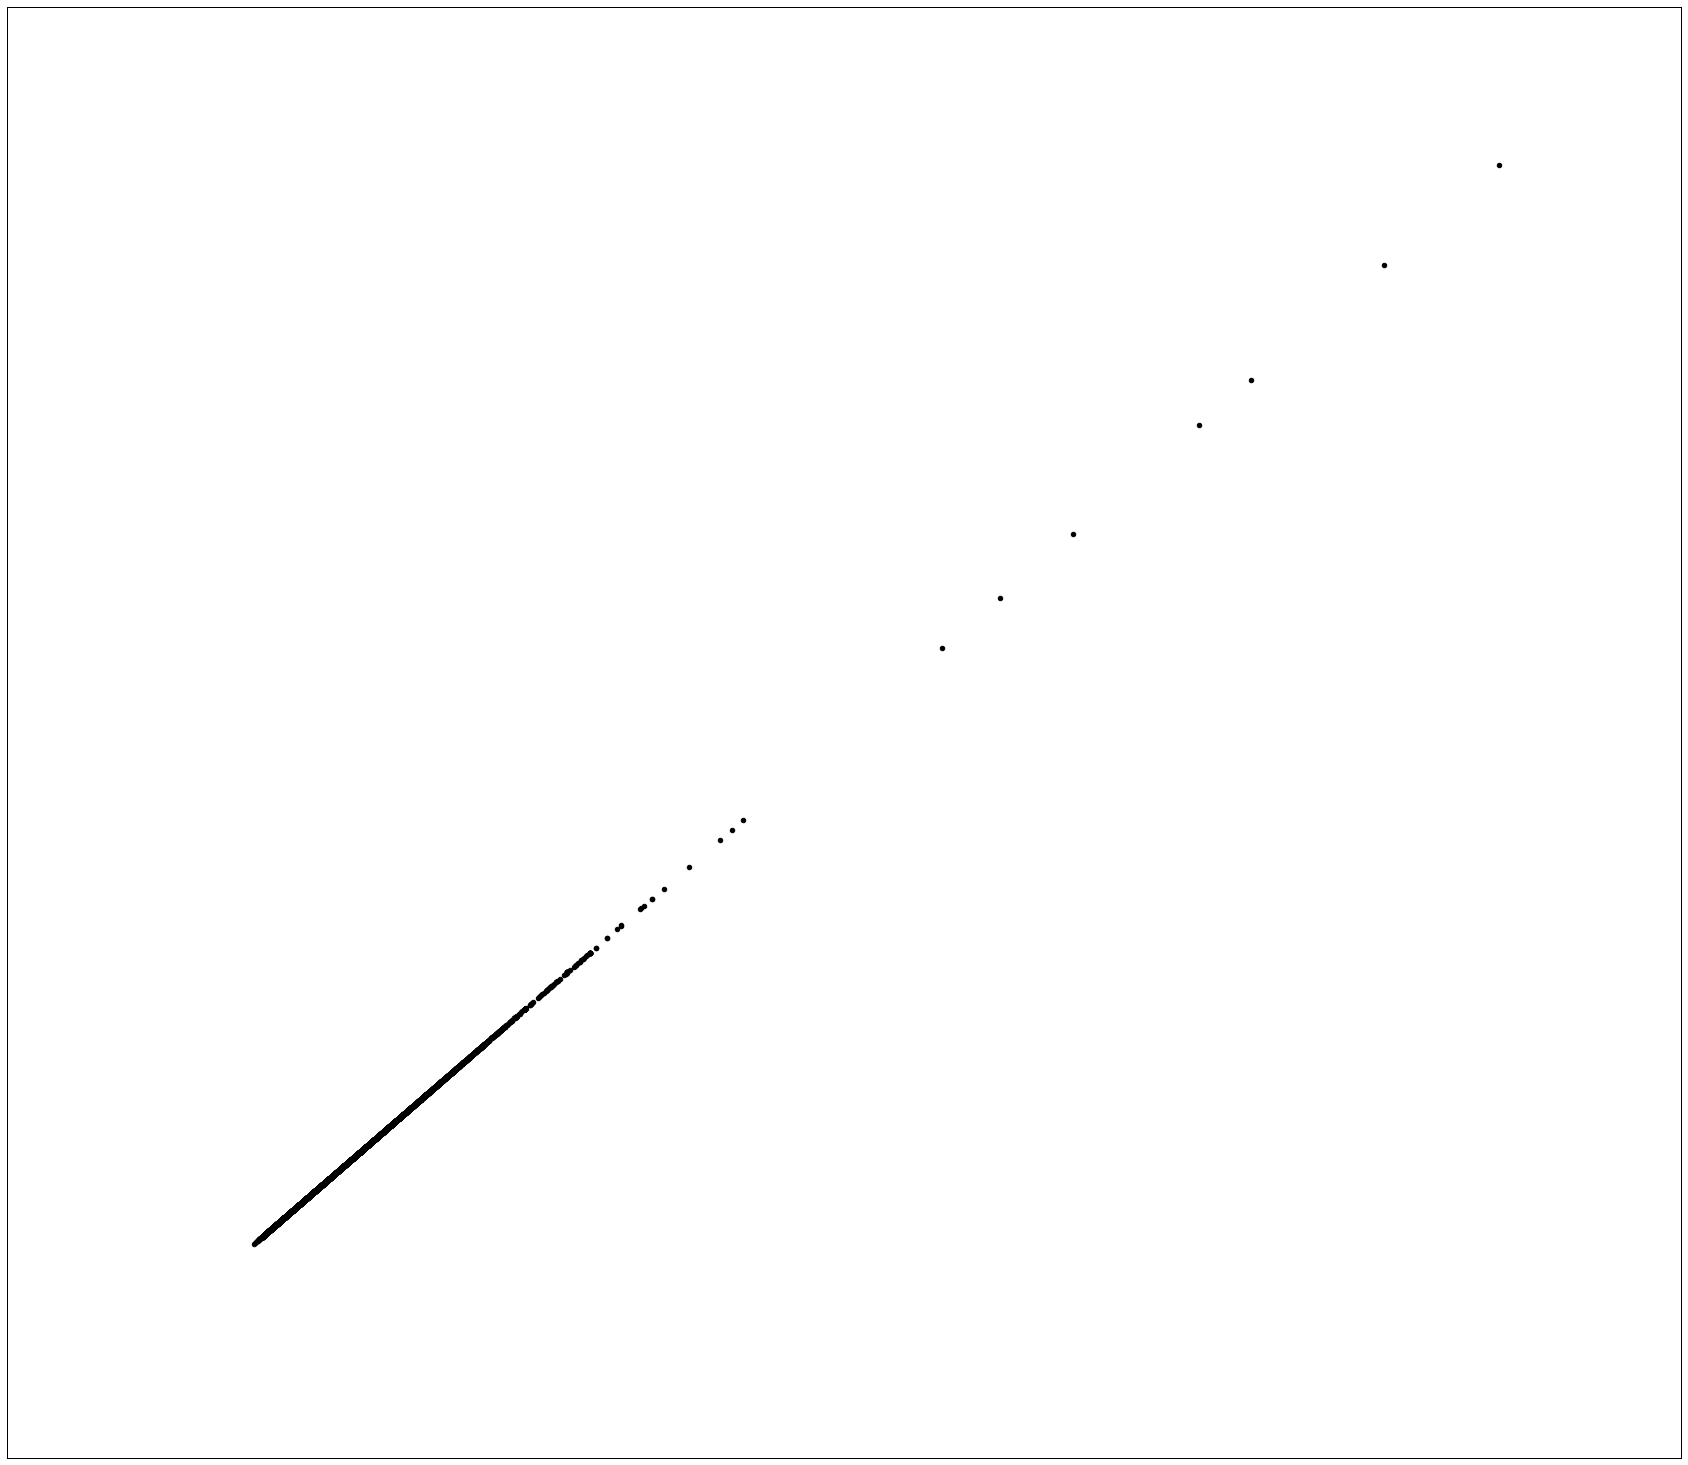

In [14]:
plt.figure(figsize=(30,26))
plt.scatter(btc_X_test, btc_y_test,  color='black')
"""plt.plot(btc_X_test, regr.predict(btc_X_test), color='blue',
         linewidth=1)"""
plt.xticks(())
plt.yticks(())
